# Supermarket Sales Analysis



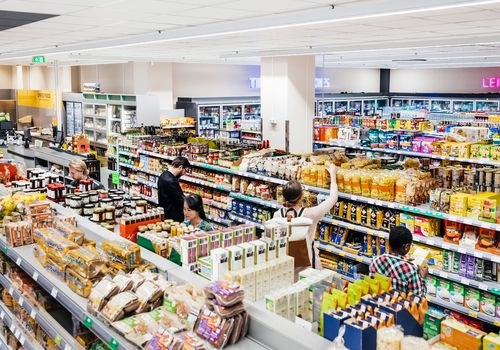

### I will analyze sales in the first **3 months** of 2019 of this dataset



#### Starting off, I will import the libraries that I will use for this analysis (Numpy, pandas, matplotlib and seaborn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Now I will take a look at our dataset


In [2]:
sales = pd.read_csv('supermarket_sales.csv',parse_dates=['Date'])
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
sales.shape

(1000, 17)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

### With these code lines, I was able to visualize some of the entries of our Dataset, in order to understand it.
### Then, I used the .shape to inform me that the dataset is composed of 17 columns and 1000 rows
### Lastly, the .info() function gave me a technical description of the Dataset, so I could check if there are any NULL entries and the data types for all Columns.
 > #### I will just make sure that the 'Date' column has the datetime Data Type

In [5]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

#### Now it is confirmed that the column 'Date' contains the right Datatype

#### I will now use the describe() Function in order to get some Statistical Data

In [6]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#### I will check once again for NULL values in any column

In [7]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
sales.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

#### After that, I will run corr() Function to get data about the correlations present in the Dataset

In [9]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


#### Now a simple graph visualization

<function matplotlib.pyplot.show(close=None, block=None)>

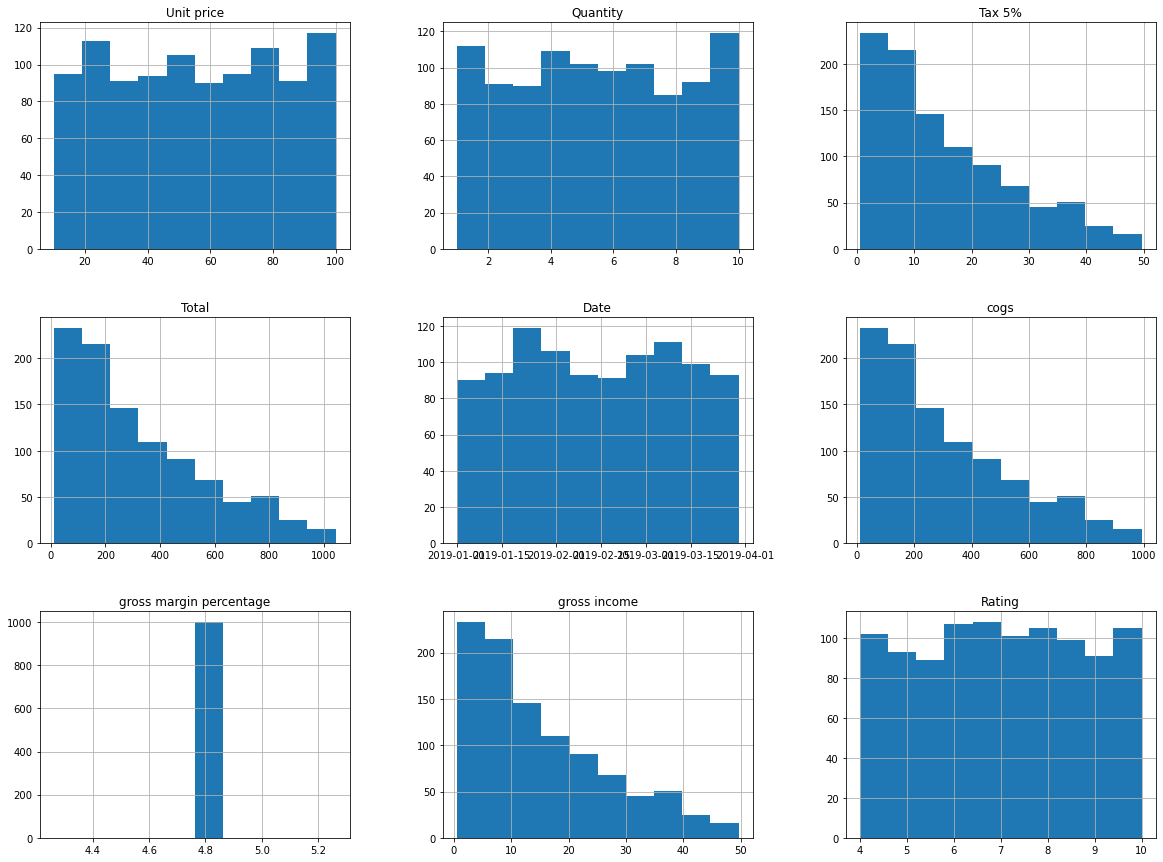

In [10]:
sales.hist(figsize=(20,15))
plt.show

#### But I wanted to make the correlation data visualization better for the reader, so we will plot a heatmap using the Seaborn library.
> Here, the lighter the color is, the more correlation is. The darker the color is, less correlation.

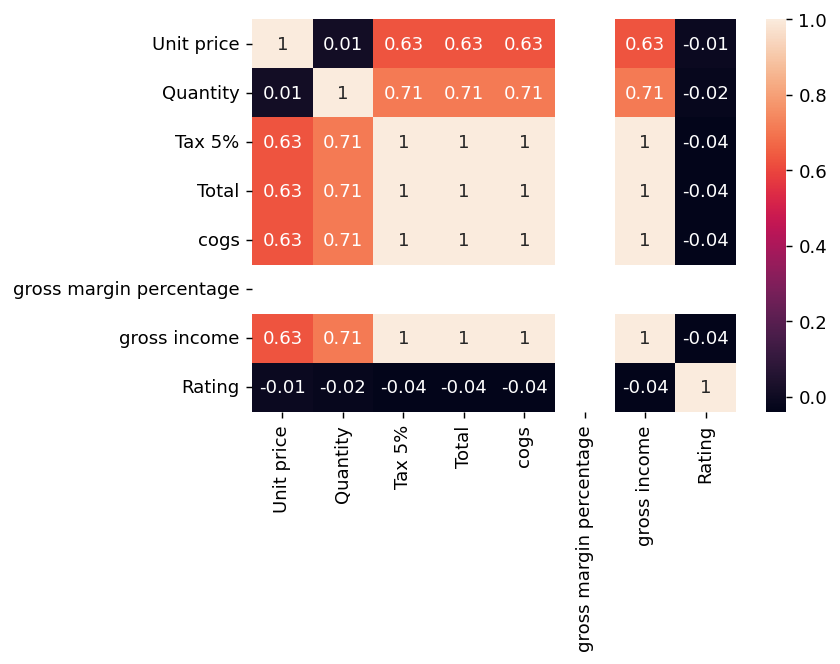

In [11]:
plt.figure(dpi=130)
sns.heatmap(np.round(sales.corr(),2), annot=True)
plt.show()


## Product Analysis

#### For this analysis, we will check which product category each city sells more
> First we need to check how many **UNIQUE** Cities are in this dataset

In [12]:
sales.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

#### We got a result of 3 Cities, being: **Yangon, Naypyitaw and Mandalay**

#### Also, it is possible to see that there is a branch column, which we need to check in order to know how many branches are in each city.

In [13]:
sales.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

#### With that, we need to check if the branches "A, B and C" are "Yangon, Naypyitaw and Mandalay" respectively
> I will plot a graph because it is better to visualize.


<function matplotlib.pyplot.show(close=None, block=None)>

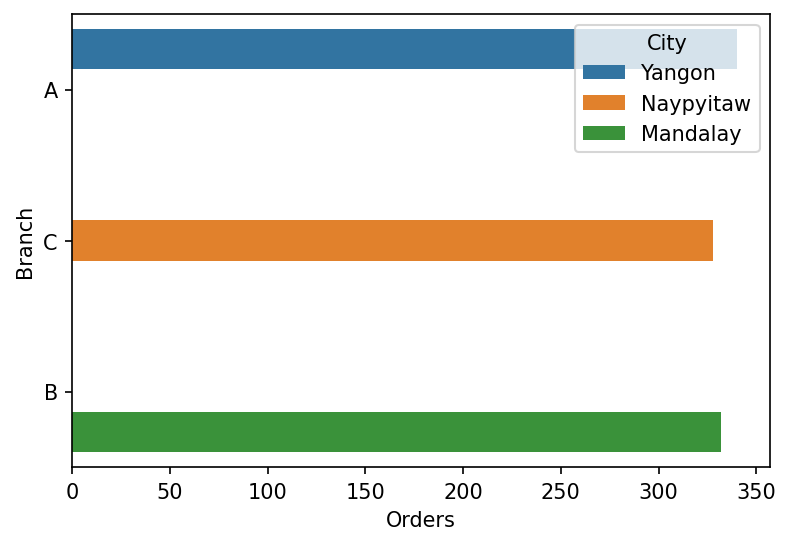

In [14]:
plt.figure(dpi=150)
sns.countplot(y='Branch', hue= 'City', data=sales)
plt.xlabel('Orders')
plt.show

#### That confirms our hypotesis, with this graph, we can observe that 100% of the sales of Branch 'A' were in Yangon, 100% of the sales of Branch 'B' were in Naypyitaw and 100% of the sales of Branch 'C' were in Mandalay
#### Now we proceed to check what product types were the most sought in each city
> By plotting a bar graph with the Product Categories x Amount of Orders per City

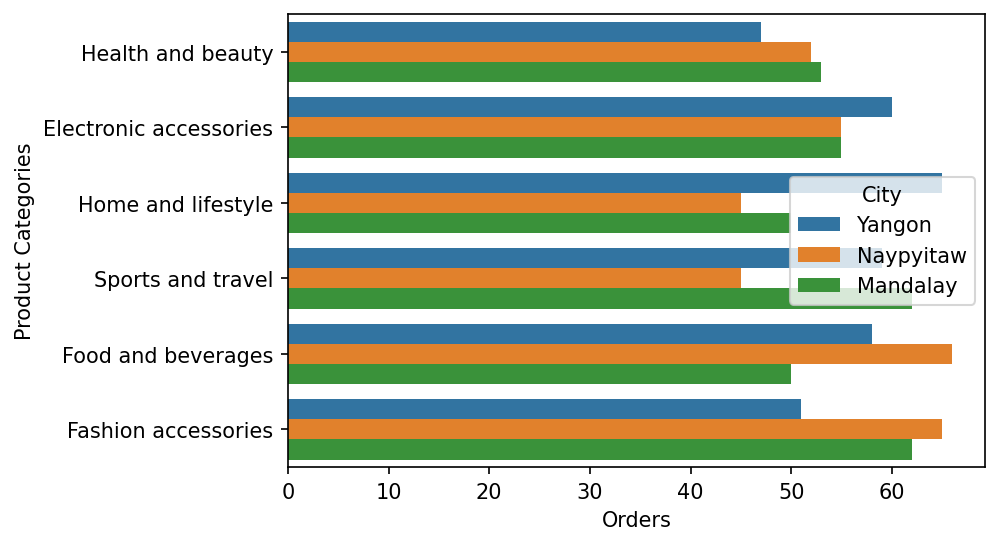

In [15]:
plt.figure(dpi=150)
sns.countplot(y='Product line', hue= 'City', data=sales)
plt.ylabel('Product Categories')
plt.xlabel('Orders')
plt.show()

### The graph shows that:
#### <span style="color:blue">Yangon City</span> (Branch 'A') sold more products in the Electronic accessories and Home and lifestyle categories
#### <span style="color:orange">Naypyitaw City</span> (Branch 'B') sold more products in the Food and beverages and Fashion accessories categories
#### <span style="color:green">Mandalay City</span> (Branch 'C') sold more products in the Sports and travel and Health and beauty categories

#### We will sum all the values inside the column 'Total' matching each Branch, so that way we can learn about each Branch's revenue.

>I also rounded that so it is better visualized

In [16]:
round(sales.groupby(['Branch'])['Total'].sum(),1)


Branch
A    106200.4
B    106197.7
C    110568.7
Name: Total, dtype: float64

### So we get the answer for the question above
#### A decrescent ranking would be: 
#### <span style="color:green">Mandalay City</span> (Branch 'C') - 110,568.7 Revenue
#### <span style="color:blue">Yangon City</span> (Branch 'A') - 106,200.4 Revenue
#### <span style="color:orange">Naypyitaw City</span> (Branch 'B') - 106,197.7 Revenue



#### <span style="color:green">Mandalay City</span> which sold more products in Sports and travel/Health and Beauty categories earned the **<span style="color:red">MOST</span>** revenue

### Product Category x Unit Price


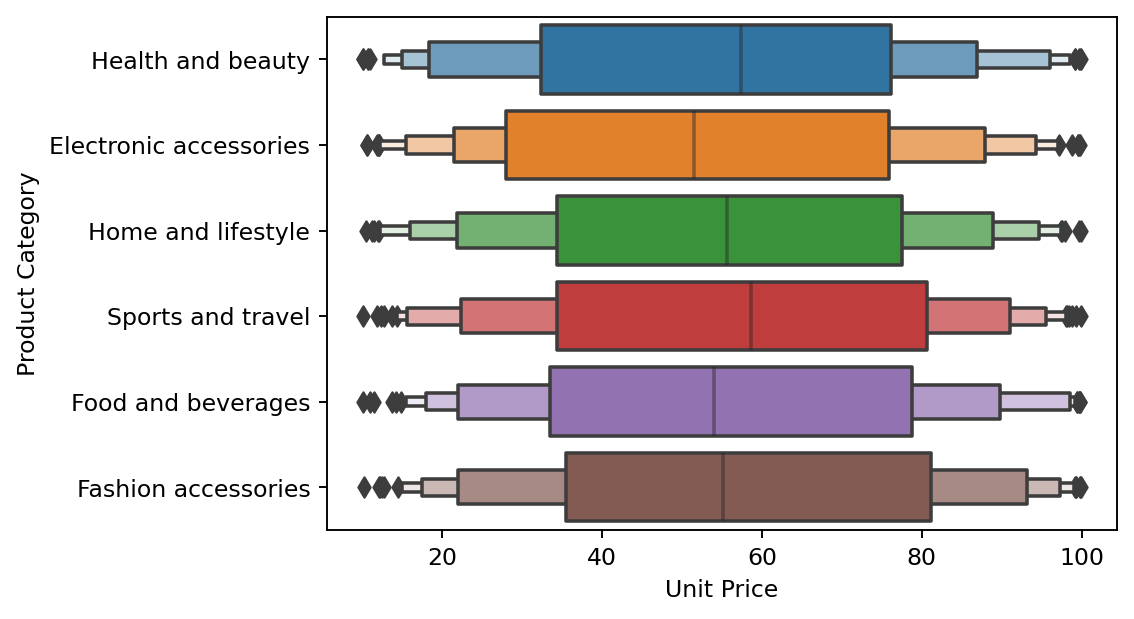

In [17]:
plt.figure(dpi=170)
sns.boxenplot(y='Product line',x='Unit price',data=sales)
plt.ylabel('Product Category')
plt.xlabel('Unit Price')
plt.show()

> Here we can see that the average unit price for the 2 Categories mentioned before (Health and Beauty/Sports and Travel) is higher than the rest.



## Customer analysis

### Product Category x Gender

<function matplotlib.pyplot.show(close=None, block=None)>

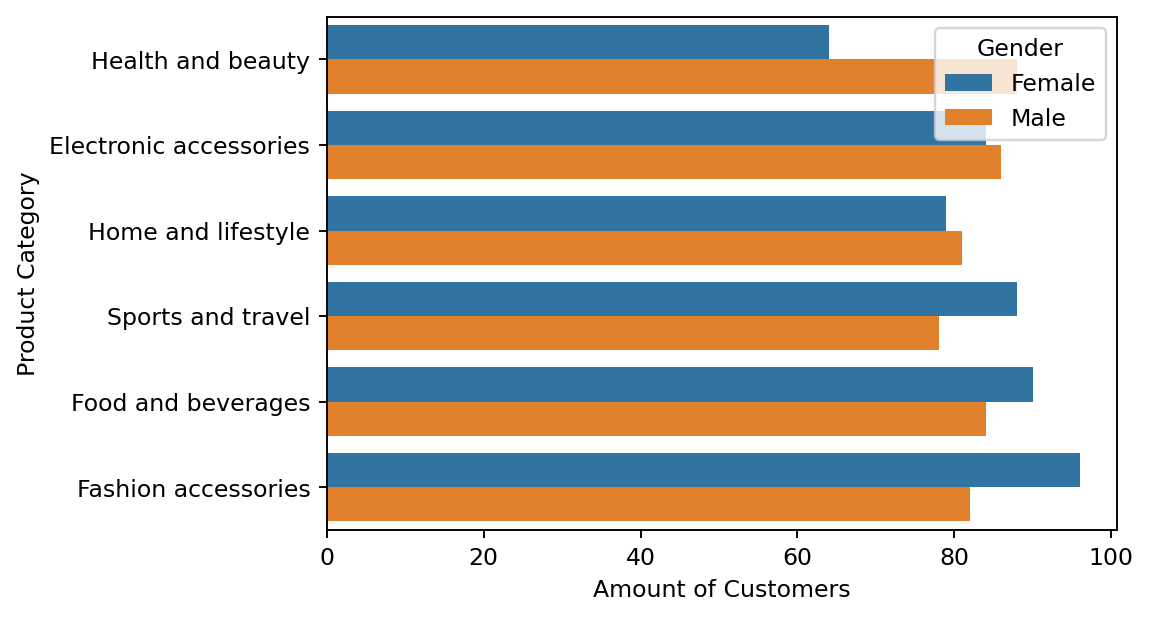

In [18]:
plt.figure(dpi=170)
sns.countplot(y = 'Product line', hue = 'Gender', data=sales)
plt.xlabel("Amount of Customers")
plt.ylabel("Product Category")
plt.show

### Customer Gender x City

<function matplotlib.pyplot.show(close=None, block=None)>

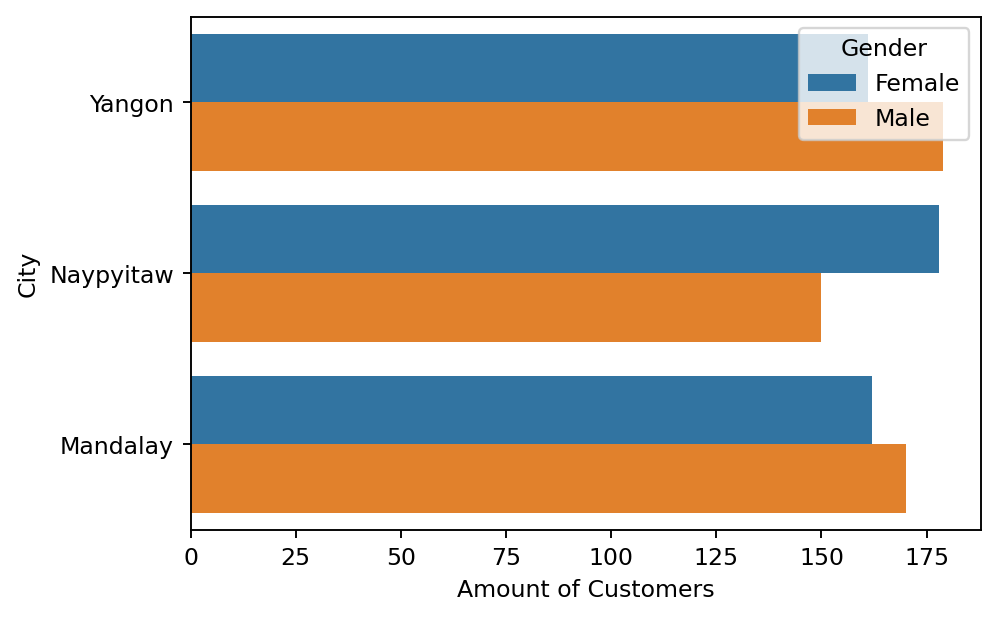

In [19]:
plt.figure(dpi=170)
sns.countplot(y = 'City', hue = 'Gender', data=sales)
plt.xlabel("Amount of Customers")
plt.show